In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import pickle

print "using ordering:", K.image_dim_ordering()

Using Theano backend.


using ordering: th


In [2]:
# load data from memory

import pickle

pickle_file = '-data.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    X = save['X']
    y = save['y']
    del save  # hint to help gc free up memory

In [3]:
# number of classes
num_classes = 2

# image dimensions
img_rows, img_cols = X.shape[1], X.shape[2]

if K.image_dim_ordering() == 'th':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

y = np_utils.to_categorical(y, num_classes)

print X.shape
print y.shape

(7806, 1, 32, 32)
(7806, 2)


(32, 32)
[ 0.  1.]


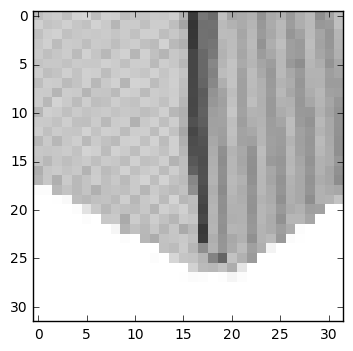

In [4]:
# preview one sample from the reloaded X dataset to make sure nothing happened along the way

%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 1000

if K.image_dim_ordering() == 'th':
    img = X[img_num][0,:,:]
else:
    img = X[img_num][:,:,0]

print img.shape
print y[img_num]
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

In [5]:
# model hyperparameters
batch_size = 32
nb_epoch = 10

# network architecture
patch_size_1 = 3
patch_size_2 = 3
patch_size_3 = 3
patch_size_4 = 3
patch_size_5 = 3

depth_1 = 64
depth_2 = 128
depth_3 = 128
depth_4 = 256
depth_5 = 256

pool_size = 2

num_hidden_1 = 512
num_hidden_2 = 1024

dropout = 0.25

In [6]:
model = Sequential()

model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='same',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_2, patch_size_2, patch_size_2,
                        border_mode='same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_3, patch_size_3, patch_size_3,
                        border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_4, patch_size_4, patch_size_4,
                        border_mode='same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_5, patch_size_5, patch_size_5,
                        border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())

model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [7]:
checkpoint_name = "-model.hdf5"
checkpointer = ModelCheckpoint(checkpoint_name, verbose=0, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [8]:
history = model.fit(X, y, validation_split=0.25, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, callbacks=[checkpointer])

Train on 5854 samples, validate on 1952 samples
Epoch 1/10
5854/5854 [==============================] - 121s - loss: 0.6928 - acc: 0.5157 - val_loss: 0.6913 - val_acc: 0.5056
Epoch 2/10
5854/5854 [==============================] - 125s - loss: 0.6922 - acc: 0.5167 - val_loss: 0.6856 - val_acc: 0.5835
Epoch 3/10
5854/5854 [==============================] - 145s - loss: 0.6811 - acc: 0.5726 - val_loss: 0.6206 - val_acc: 0.6860
Epoch 4/10
5854/5854 [==============================] - 126s - loss: 0.6341 - acc: 0.6416 - val_loss: 0.6258 - val_acc: 0.6711
Epoch 5/10
5854/5854 [==============================] - 151s - loss: 0.5957 - acc: 0.6700 - val_loss: 0.5665 - val_acc: 0.7034
Epoch 6/10
5854/5854 [==============================] - 138s - loss: 0.5440 - acc: 0.7081 - val_loss: 0.4957 - val_acc: 0.7418
Epoch 7/10
5854/5854 [==============================] - 172s - loss: 0.5009 - acc: 0.7443 - val_loss: 0.6188 - val_acc: 0.7403
Epoch 8/10
5854/5854 [==============================] - 252s - 